In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [3]:
df=pd.read_csv('../data/Season_2017.csv')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
n = 75
df=df.head(int(len(df)*(n/100)))

In [6]:
n = 25
df2=df.tail(int(len(df)*(n/100)))

Find and eliminate NaNs

In [7]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [8]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
          'H_Opp_win_probability_subtracted'],axis=1)

In [9]:
df.home_win.value_counts(normalize=True)

1    0.541164
0    0.458836
Name: home_win, dtype: float64

In [10]:
df2.home_win.value_counts(normalize=True)

1    0.553846
0    0.446154
Name: home_win, dtype: float64

In [11]:
#df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
1367,KCR,34.172840,4.333333,8.864198,4.074074,4.159383,2.407407,7.197531,37.203704,0.252938,...,12.438272,15.148148,6.987654,0.006173,48.746914,1.472050,0.378882,0.009642,-0.084568,1
1368,LAA,33.425926,4.382716,8.111111,4.185185,4.071914,3.228395,7.395062,37.487654,0.237475,...,11.456790,14.425926,6.388889,0.006173,50.388889,1.679245,0.433962,0.032451,0.349383,1
1369,BOS,34.993827,4.845679,9.018519,4.537037,4.422037,3.524691,7.555556,39.148148,0.252994,...,11.487654,12.993827,6.006173,0.000000,48.302469,1.950311,0.571429,-0.016685,-0.554321,1
1370,SDP,33.061728,3.728395,7.722222,3.555556,3.601728,2.839506,9.253086,36.753086,0.229593,...,12.345679,15.500000,7.487654,0.024691,53.462963,1.455128,0.333333,0.088105,0.733951,1
1371,OAK,33.728395,4.561728,8.296296,4.370370,4.483642,3.487654,9.203704,37.814815,0.240173,...,10.629630,12.833333,6.487654,0.000000,46.456790,1.867925,0.547170,0.008123,-0.301852,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,SDP,33.061728,3.728395,7.722222,3.555556,3.601728,2.839506,9.253086,36.753086,0.229593,...,11.444444,13.635802,5.944444,0.006173,49.450617,1.329193,0.403727,-0.020815,-0.461111,0
1818,DET,34.296296,4.537037,8.858025,4.314815,4.334259,3.104938,8.104938,37.962963,0.252235,...,10.746914,13.314815,6.098765,0.000000,50.000000,1.333333,0.444444,-0.041759,-0.278395,0
1819,SFG,34.265432,3.944444,8.530864,3.777778,3.593889,2.882716,7.432099,37.882716,0.243852,...,11.882716,14.895062,6.796296,0.024691,52.864198,1.320513,0.365385,0.052444,0.329630,1
1820,COL,34.160494,5.086420,9.320988,4.895062,4.978086,3.203704,8.691358,38.277778,0.268130,...,12.320988,13.691358,6.567901,0.000000,49.370370,1.018750,0.331250,0.006568,0.176543,1


In [12]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,TBR,33.814815,4.283951,8.271605,4.141975,4.117840,3.364198,9.493827,37.944444,0.239617,...,11.487654,12.993827,6.006173,0.000000,48.302469,1.950311,0.571429,-0.016685,-0.554321,1
1,ARI,34.104938,5.012346,8.672840,4.790123,4.939444,3.567901,8.987654,38.419753,0.249259,...,12.345679,15.500000,7.487654,0.024691,53.462963,1.455128,0.333333,0.088105,0.733951,1
2,STL,33.765432,4.697531,8.654321,4.493827,4.486728,3.660494,8.320988,38.388889,0.252457,...,11.839506,13.160494,6.592593,0.006173,49.012346,1.453416,0.472050,-0.011130,-0.415432,1
3,TEX,33.518519,4.932099,8.185185,4.666667,4.781358,3.358025,9.216049,37.790123,0.240247,...,10.629630,12.833333,6.487654,0.000000,46.456790,1.867925,0.547170,0.008123,-0.301852,0
4,MIL,33.691358,4.444444,8.351852,4.216049,4.273951,3.271605,9.697531,37.703704,0.243426,...,13.265432,13.413580,6.629630,0.018519,46.876543,1.465839,0.472050,0.015272,-0.198765,0


In [13]:
#for col in X_train.columns:
    #print(col)

In [14]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [15]:
tiny_importance_list=['H_at_bats','H_win_probability_added','H_fly_balls']

In [16]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
1367,KCR,34.172840,4.333333,8.864198,4.074074,4.159383,2.407407,7.197531,37.203704,0.252938,...,12.438272,15.148148,6.987654,0.006173,48.746914,1.472050,0.378882,0.009642,-0.084568,1
1368,LAA,33.425926,4.382716,8.111111,4.185185,4.071914,3.228395,7.395062,37.487654,0.237475,...,11.456790,14.425926,6.388889,0.006173,50.388889,1.679245,0.433962,0.032451,0.349383,1
1369,BOS,34.993827,4.845679,9.018519,4.537037,4.422037,3.524691,7.555556,39.148148,0.252994,...,11.487654,12.993827,6.006173,0.000000,48.302469,1.950311,0.571429,-0.016685,-0.554321,1
1370,SDP,33.061728,3.728395,7.722222,3.555556,3.601728,2.839506,9.253086,36.753086,0.229593,...,12.345679,15.500000,7.487654,0.024691,53.462963,1.455128,0.333333,0.088105,0.733951,1
1371,OAK,33.728395,4.561728,8.296296,4.370370,4.483642,3.487654,9.203704,37.814815,0.240173,...,10.629630,12.833333,6.487654,0.000000,46.456790,1.867925,0.547170,0.008123,-0.301852,1


In [17]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [18]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [52]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [22]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [19]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

## Feature Selection

In [71]:
# pca=PCA(n_components=0.7)
# train_pca=pca.fit_transform(X_train_scaled)
# test_pca=pca.transform(X_test_scaled)

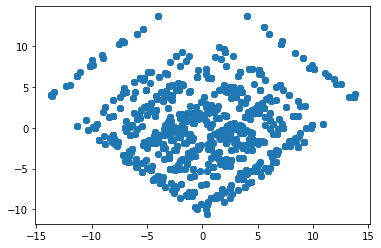

In [51]:
#plt.scatter(train_pca[:,0], train_pca[:,1]);

In [20]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)

In [21]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

# Logistic Regression

### All Feats

Penalty: l1
Solver: liblinear
Mean Cross-Val Score: 0.5708098750564503
Train Mean Accuracy: 0.5801317233809001
Test Mean Accuracy: 0.5956043956043956
Recall Score: 0.746031746031746
Precision Score: 0.6103896103896104
F1 Score: 0.6714285714285714


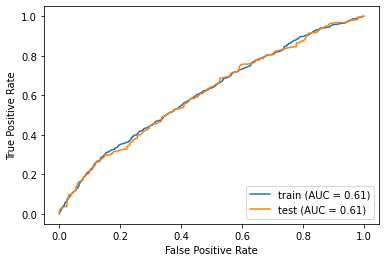

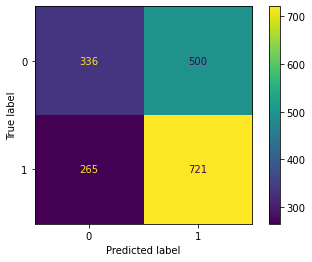

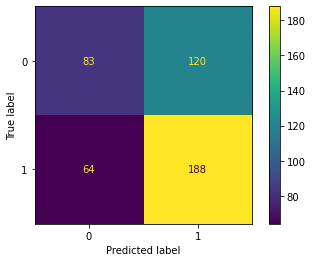

In [22]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [20]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy,count

In [24]:
new_acc(probabilities)

(0.6824324324324325, 101)

### Home_win, zero imp
***

In [21]:
feats= feature_select(zero_imp_train,y_train,LogisticRegression,min_features=10)

In [22]:
X_train_best_log = zero_imp_train[feats]
X_test_best_log = zero_imp_test[feats]

Penalty: l1
Solver: liblinear
Mean Cross-Val Score: 0.5691434592804455
Train Mean Accuracy: 0.5729967069154775
Test Mean Accuracy: 0.5692307692307692
Recall Score: 0.7222222222222222
Precision Score: 0.5909090909090909
F1 Score: 0.65


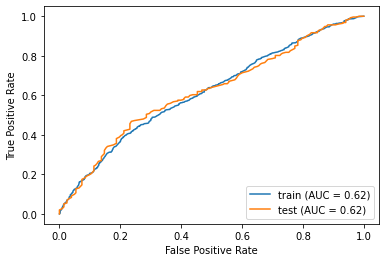

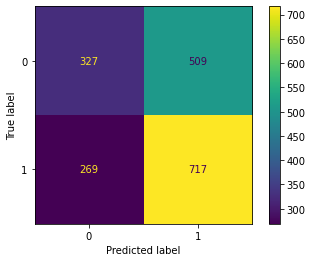

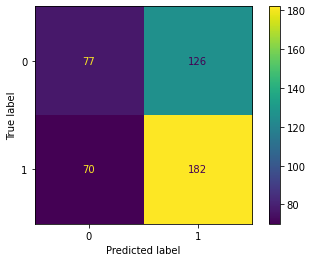

In [23]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [24]:
new_acc(probabilities)

(0.7070063694267515, 111)

# KNN

### Home win KNN

Number of Neighbors: 17
Metric: manhattan
Weights: uniform
Mean Cross-Val Score: 0.531281047719404
Train Mean Accuracy: 0.6207464324917673
Test Mean Accuracy: 0.6351648351648351
Recall Score: 0.7698412698412699
Precision Score: 0.6423841059602649
F1 score: 0.700361010830325


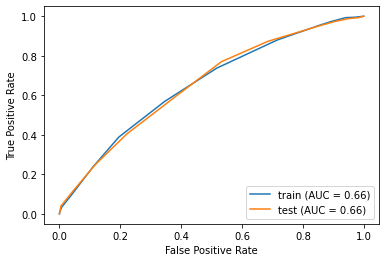

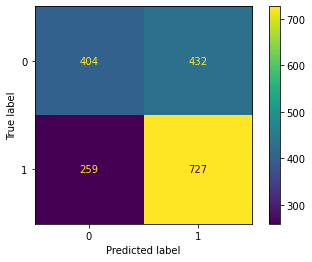

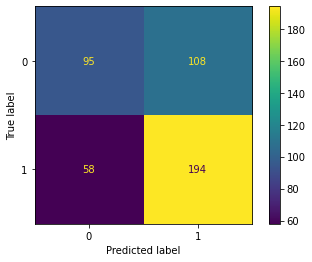

In [25]:
prediction,probabilities=knn(X_train_scaled,X_test_scaled,y_train,y_test)

In [26]:
new_acc(probabilities)

(0.6963350785340314, 133)

### Zero imp

Number of Neighbors: 13
Metric: manhattan
Weights: uniform
Mean Cross-Val Score: 0.5334833659491194
Train Mean Accuracy: 0.6267837541163557
Test Mean Accuracy: 0.6505494505494506
Recall Score: 0.7619047619047619
Precision Score: 0.6597938144329897
F1 score: 0.707182320441989


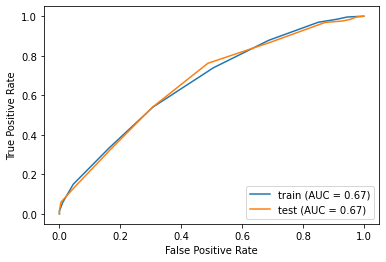

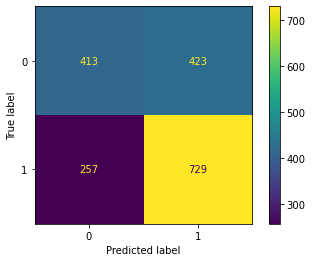

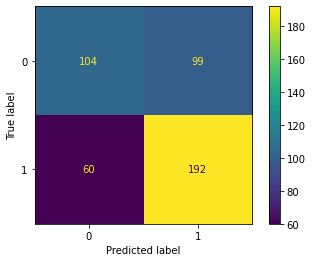

In [25]:
prediction,probabilities=knn(zero_imp_train,zero_imp_test,y_train,y_test)

In [26]:
new_acc(probabilities)

(0.6757679180887372, 198)

# Decision Tree

In [24]:
dfeats= feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = X_train_scaled[dfeats]
X_test_best_tree = X_test_scaled[dfeats]

### Dtree Home Win

Max Depth: 3
Min Sample Split: 2
criterion: entropy
Mean Cross-Val Score: 0.5784319714903907
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.5909090909090909
Recall Score: 0.5454545454545454
Precision Score: 0.6
F1 score: 0.5714285714285713


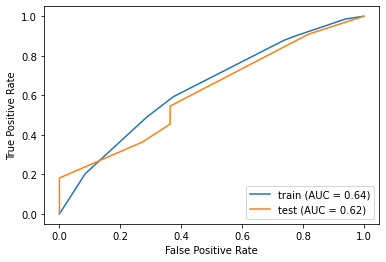

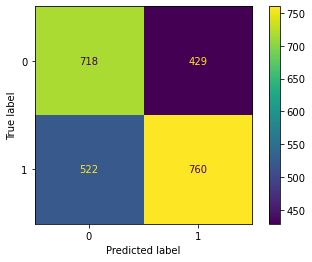

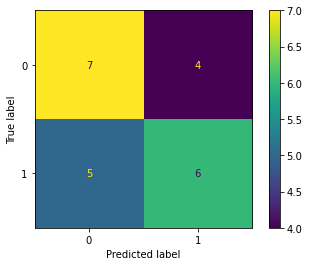

In [25]:
predictions,probabilities=dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

In [27]:
new_acc(probabilities)

0.5833333333333334

# Random Forest

### All Feats

In [27]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 75
criterion: gini
Mean Cross-Val Score: 0.5137272316724372
Train Mean Accuracy: 0.7074643249176729
Test Mean Accuracy: 0.7032967032967034
Recall Score: 0.7658730158730159
Precision Score: 0.7174721189591078
F1 score: 0.7408829174664109


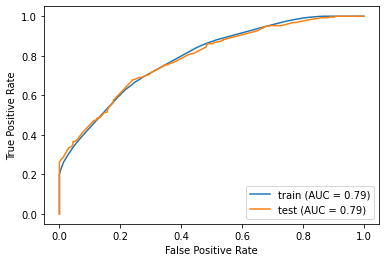

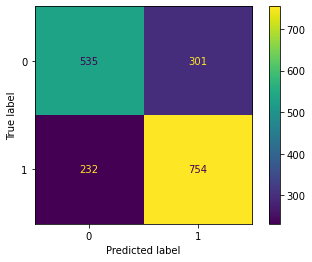

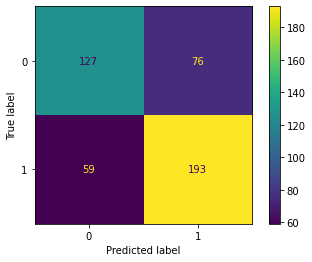

In [28]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [29]:
new_acc(probabilities)

(0.7657142857142857, 268)

### Zero imp

In [27]:
rfeats= feature_select(zero_imp_train,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = zero_imp_train[rfeats]
X_test_best_for = zero_imp_test[rfeats]

Number of Trees: 500
criterion: gini
Mean Cross-Val Score: 0.513725726328466
Train Mean Accuracy: 0.7074643249176729
Test Mean Accuracy: 0.7054945054945055
Recall Score: 0.7936507936507936
Precision Score: 0.7092198581560284
F1 score: 0.749063670411985


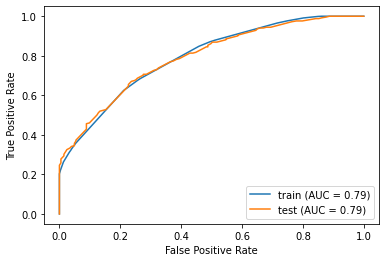

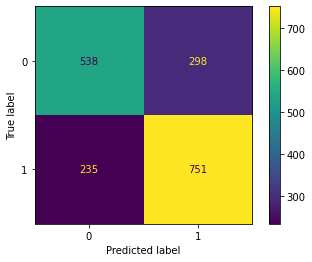

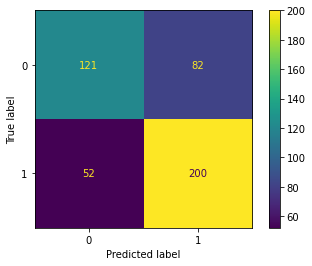

In [28]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [29]:
new_acc(probabilities)

(0.7685714285714286, 269)

# Bagging Classifier

Dec Tree Max Depth: 2
Dec Tree Criterion: gini
Bagging Max Samples: 3
Bag Max Features: 2
# of Base Estimators: 500
Mean Cross-Val Score: 0.5891468329727207
Train Mean Accuracy Score: 0.5673116508851379
Test Mean Accuracy Score: 0.5
Recall Score: 1.0
Precision Score: 0.5
F1 score: 0.6666666666666666


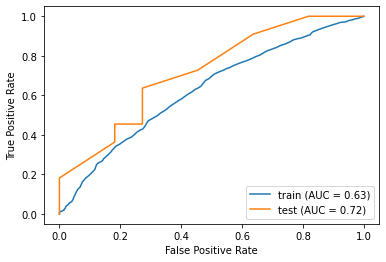

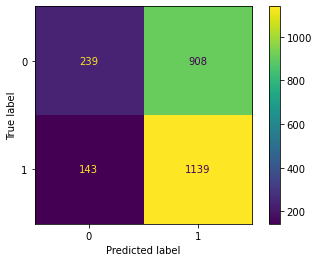

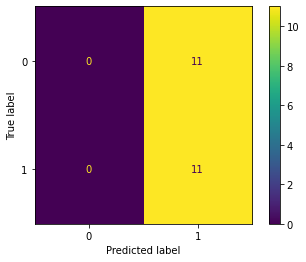

In [53]:
bagged(X_train_scaled,X_test_scaled,y_train,y_test)

# XGBoost

In [56]:
xfeats= feature_select(zero_imp_train,y_train,XGBClassifier,min_features=10)
X_train_best_x = zero_imp_train[xfeats]
X_test_best_x = zero_imp_test[xfeats]

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 3
XGBoost Min Child Weight: 1
XGBoost Subsample: 0.7
XGBoost Estimators: 100
Stopped in Round: 15
Mean Cross-Val Score: 0.5409766238174027
Train Mean Accuracy Score: 0.6990531082750103
Test Mean Accuracy Score: 0.6363636363636364
Recall Score: 0.6363636363636364
Precision Score: 0.6363636363636364
F1 score: 0.6363636363636364


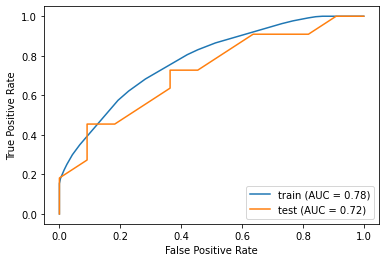

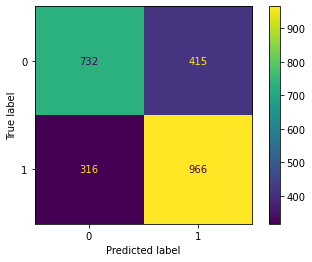

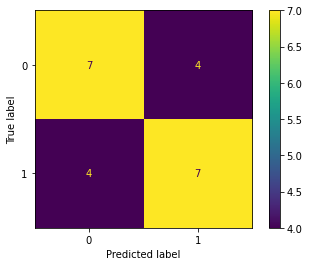

In [57]:
xgboost(X_train_best_x, X_test_best_x, y_train, y_test, cv=5)